# Diversifying Parameters in Reinforcement Learning (Distributional RL)
Package designed to simulate the expected shape of an agent using a distributional TD-$\lambda$ learning scheme, an algorithm thought to be encoded by dopamine neurons in the striatum (when learning). The following functionality is included to model experiments and agents:
- Task contigencies (number and timing of cues, reward sizes and delays, etc.)
- Diversity of parameters in TD error computation ($\alpha$, $\gamma$, $\lambda$)
- Associated visualizations (learning/value at time of cue over trials, animations, etc.)
- Saving simulation data/visualizations through function parameters
<br><br>

Change the objects/functions as needed, particularly in the `drl.py` file! See examples, below. 

In [8]:
#(1) Re-run this cell between every run of an `sim.ipynb`, if you make updates to the `drl.py` file!
import drl
import torch
import importlib

importlib.reload(drl)
torch.manual_seed(0)

<h1>Trial Parameters</h1>
<p>Below, we encode sample task parameters. These parameters are utilized in the `init` and `sim` functions for simulation - check `drl.py` and documentation in `drl.md` for how to use this in creating your own experiment.</p>

In [9]:
n_trials = 200 # number of trials
t_int = 7 # length of trial
dt = 0.1 # timestep size (of tensor in simulation)
tsk = "hyp_unif" # to specify reward schedules, CHECK drl.py `init` to add more tasks, reward schedules 

types = 1 # types of trials
t_stim = torch.tensor([2]) # time of stimulus
t_rew = torch.tensor([6]) # time of reward
s_rew = torch.tensor([1]) # size of reward
n_predictors = 20  # number of value predictors
 
# Advanced Parameters
unc = 0 #uncertainty factor

In [ ]:
n_trials = 200 # number of trials
t_int = 7 # length of trial
dt = 0.1 # timestep size
tsk = "var" # to specify reward schedules

types = 1 # types of trials
t_stim = torch.full((types,), 2) # time of stimulus
t_rew = torch.full((types,), 6) # time of reward
s_rew = torch.tensor([[0.1, 0.06612594], [0.3, 0.09090909], [1.2, 0.14847358], [2.5, 0.15489467], [5, 0.31159175], [10, 0.150519], [20, 0.07705306]])
n_predictors = 25  # number of value predictors
 
# Advanced Parameters
unc = 0 #uncertainty factor

In [ ]:
n_trials = 200
t_int = 8 # length of trial
dt = 0.5 # timestep size
tsk = "delay"

types = 6
t_stim = torch.full((types,), 1)
t_rew = torch.tensor([2.25, 3.5, 5, 7.5, 2, 2])
s_rew = torch.tensor([3, 3, 3, 3, 0.5, (1/6)])
n_predictors = 20 # number of value predictors

# Advanced Parameters
unc = 0

<h1>Simulations</h1>

In [10]:
#Initialize experiment set-up (time intervals, rewards, etc.)
T, x, r = drl.init(tsk = tsk,
                   n_trials = n_trials, 
                   t_int = t_int, 
                   delta = dt, 
                   types = types,
                   t_stim = t_stim,
                   t_rew = t_rew,
                   s_rew = s_rew,
                   uncertainty = unc)

#Simulate experiment with given parameters
exp = drl.sim(T, x, r, 
                tsk = tsk,
                num_predictors = n_predictors,
                a = [0.2, 0.4, 0.6], 
                g = (0.3,0.8),
                l = 0.2)


[0.2, 0.4, 0.6]


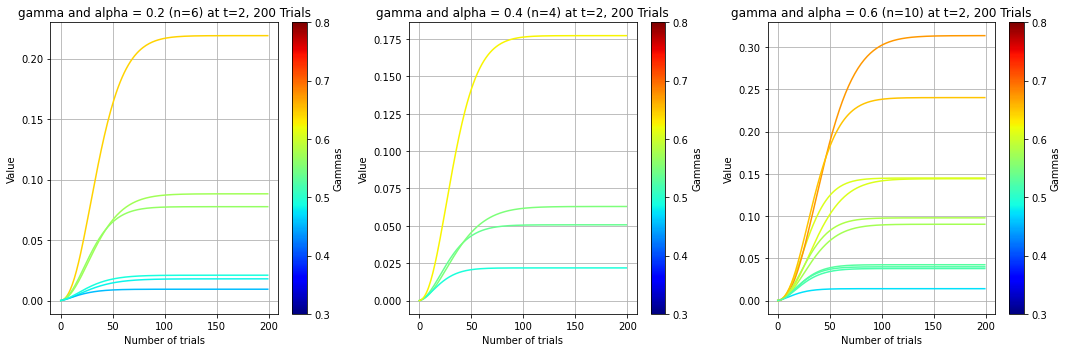

In [11]:
# 
drl.val_at_t(exp, state = 0, 
             time = 2, 
             diversify = ["gamma", (0.3,0.8), "alpha", [0.2, 0.4, 0.6]],
             fname = "test")

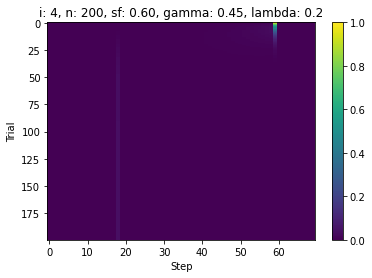

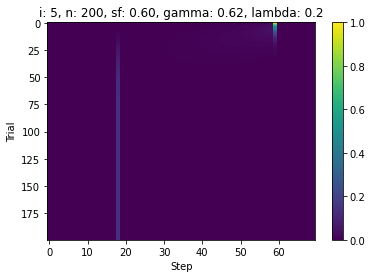

In [12]:
drl.heatmap(exp, state = 0, 
            prs = range(4,6), 
            diversify=["gamma", "alpha"],
            fname="test")

In [13]:
drl.val_over_t(exp, st = 0, stp = 0.5,
                    fname = "test",
                    diversify = ["gamma", (0.3,0.8), "alpha", [0.2, 0.4, 0.6]],
                    trials=[5,15])

<h2>Loading Files and Modeling real tasks</h2>

In [14]:
n_trials = 200 # number of trials
t_int = 7 # length of trial
dt = 0.1 # timestep size
tsk = "var" # to specify reward schedules

types = 1 # types of trials
t_stim = torch.full((types,), 2) # time of stimulus
t_rew = torch.full((types,), 6) # time of reward
s_rew = torch.tensor([[0.1, 0.06612594], [0.3, 0.09090909], [1.2, 0.14847358], [2.5, 0.15489467], [5, 0.31159175], [10, 0.150519], [20, 0.07705306]])
n_predictors = 25  # number of value predictors
 
# Advanced Parameters
unc = 0 #uncertainty factor

In [15]:
T, x, r = drl.init(tsk = tsk,
                   n_trials = n_trials, 
                   t_int = t_int, 
                   delta = dt, 
                   types = types,
                   t_stim = t_stim,
                   t_rew = t_rew,
                   s_rew = s_rew,
                   uncertainty = unc)

var = drl.sim(T, x, r, 
                tsk = tsk,
                num_predictors = n_predictors,
                a = (0.3,0.8),
                g = [0.2, 0.4, 0.6],
                l = 0.2, 
                fname = "var")

In [16]:
v = torch.load("var.pth")

[0.2, 0.4, 0.6]


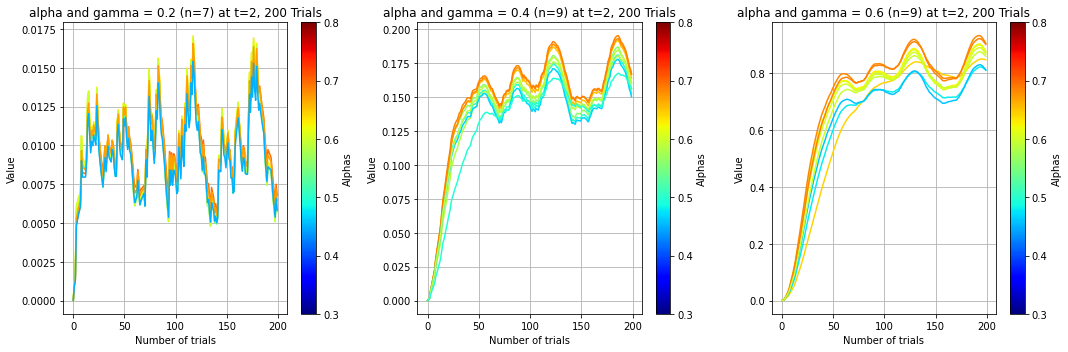

In [17]:
drl.val_at_t(v, state = 0, 
             time = 2, 
             diversify = ["alpha", (0.3,0.8), "gamma", [0.2, 0.4, 0.6]],
             fname = "var")

[0.2, 0.4, 0.6]


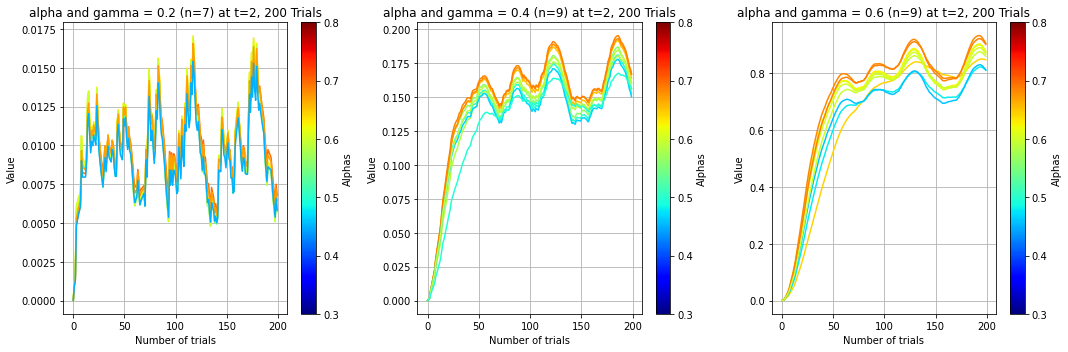

In [18]:
drl.val_at_t(var, state = 0, 
             time = 2, 
             diversify = ["alpha", (0.3,0.8), "gamma", [0.2, 0.4, 0.6]],
             fname = "var")

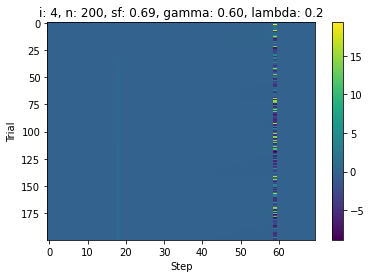

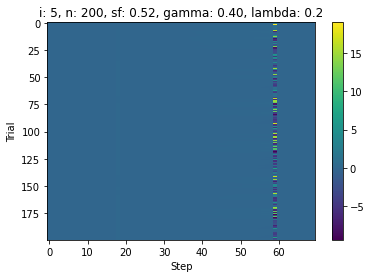

In [19]:
drl.heatmap(v, state = 0, 
            prs = range(4,6), 
            diversify=["gamma", "alpha"],
            fname="var")

In [ ]:
drl.val_over_t(v, st = 0, stp = 0.5,
                    fname = "var",
                    diversify = ["alpha", (0.3,0.8), "gamma", [0.2, 0.4, 0.6]])